# Final Project Term Paper
Faculty for Environment and Natural Resources
Module „Supply chain modelling, indicators and responsibility “, Sommer term 2023

## Step 3: Calculate footprints

In [2]:
import pandas as pd
import numpy as np
import pymrio
import os
import matplotlib.pyplot as plt

exio3_folder = "/users/dannyeel/documents/pymrio"
exio3 = pymrio.parse_exiobase3(os.path.join(exio3_folder, "IOT_2015_pxp.zip"))
exio3.calc_all()

In [3]:
# get unique units for EXIO
np.unique(exio3.impacts.unit.values)

array(['1000 p.', 'Accumulated Exceedance (AE)', 'CTUe = PAF.m3.year',
       'CTUh = cases', 'CTUh/kg = cases', 'DALY', 'Gg', 'Gg CO2-eq',
       'M.EUR', 'Mm3', 'PAF m3.day', 'PDF', 'PDF*m2*yr', 'PDF.m3.year',
       'cases', 'elu', 'hr', 'kg', 'kg 1,4-dichlorobenzene eq.',
       'kg CFC-11 eq.', 'kg CO2 eq.', 'kg CO2-Equivalents', 'kg NOx eq.',
       'kg PM2.5-eq', 'kg PO4--- eq.', 'kg SO2 eq.', 'kg ethylene eq.',
       'kg formed ozone', 'kg-C2H4 equivalents', 'kg-N equivalent', 'km2',
       'kt', 'm3'], dtype=object)

In [4]:
# select impacts that share the same unit
df = exio3.impacts.unit
chosen_unit = "DALY"
df.loc[df["unit"] == chosen_unit]

,unit
impact,
Carcinogenic effects on humans (H.A) | ECOINDICATOR 99 (H.A) | Carcinogenic effects on humans (H.A),DALY
Respiratory effects on humans caused by organic substances (H.A) | ECOINDICATOR 99 (H.A) | Respiratory effects on humans caused by organic substances (H.A),DALY
Respiratory effects on humans caused by inorganic substances (H.A) | ECOINDICATOR 99 (H.A) | Respiratory effects on humans caused by inorganic substances (H.A),DALY
Damages to human health caused by climate change (H.A) | ECOINDICATOR 99 (H.A) | Damages to human health caused by climate change (H.A),DALY
Carcinogenic effects on humans (E.E) | ECOINDICATOR 99 (E.E) | Carcinogenic effects on humans (E.E),DALY
Respiratory effects on humans caused by organic substances (E.E) | ECOINDICATOR 99 (E.E) | Respiratory effects on humans caused by organic substances (E.E),DALY
Respiratory effects on humans caused by inorganic substances (E.E) | ECOINDICATOR 99 (E.E) | Respiratory effects on humans caused by inorganic substances (E.E),DALY
Damages to human health caused by climate change (E.E) | ECOINDICATOR 99 (E.E) | Damages to human health caused by climate change (E.E),DALY
Carcinogenic effects on humans (I.I) | ECOINDICATOR 99 (I.I) | Carcinogenic effects on humans (I.I),DALY


__Disability-adjusted life years__ (DALYs):

_One DALY represents the loss of the equivalent of one year of full health. DALYs for a disease or health condition are the sum of the years of life lost to due to premature mortality (YLLs) and the years lived with a disability (YLDs) due to prevalent cases of the disease or health condition in a population._

In [5]:
impact_cat_names = [
    "Climate change endpoint, human health | ILCD recommended CF | Disability Adjusted Life Years (DALY)",
    "Human toxicity endpoint, cancer effects | ILCD recommended CF | Disability Adjusted Life Years (DALY)",
    "Particulate matter/Respiratory inorganics endpoint | ILCD recommended CF | Disability Adjusted Life Years (DALY)",
    "Human toxicity endpoint, non-cancer effects | ILCD recommended CF | Disability Adjusted Life Years (DALY)",
]

In [6]:
# create filtered S matrix dataframe
S_pick = exio3.impacts.S.loc[impact_cat_names]
S_pick

region                                                     AT            \
sector                                             Paddy rice     Wheat   
impact                                                                    
Climate change endpoint, human health | ILCD re...          0  2.257690   
Human toxicity endpoint, cancer effects | ILCD ...          0  0.002472   
Particulate matter/Respiratory inorganics endpo...          0  2.580708   
Human toxicity endpoint, non-cancer effects | I...          0  0.018022   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Climate change endpoint, human health | ILCD re...          1.277702   
Human toxicity endpoint, cancer effects | ILCD ...          0.001949   
Particulate matter/Respiratory inorganics endpo...          1.726291   
Human toxicity endpoint, non-cancer effects | I...          0.007506   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Climate change endpoint, human health | ILCD re...                0.192523   
Human toxicity endpoint, cancer effects | ILCD ...                0.000216   
Particulate matter/Respiratory inorganics endpo...                0.204161   
Human toxicity endpoint, non-cancer effects | I...                0.001558   

region                                                        \
sector                                             Oil seeds   
impact                                                         
Climate change endpoint, human health | ILCD re...  1.773244   
Human toxicity endpoint, cancer effects | ILCD ...  0.002088   
Particulate matter/Respiratory inorganics endpo...  2.364882   
Human toxicity endpoint, non-cancer effects | I...  0.007670   

region                                                                     \
sector                                             Sugar cane, sugar beet   
impact                                                                      
Climate change endpoint, human health | ILCD re...               1.149034   
Human toxicity endpoint, cancer effects | ILCD ...               0.000708   
Particulate matter/Respiratory inorganics endpo...               1.348293   
Human toxicity endpoint, non-cancer effects | I...               0.004270   

region                                                                 \
sector                                             Plant-based fibers   
impact                                                                  
Climate change endpoint, human health | ILCD re...       5.092737e-01   
Human toxicity endpoint, cancer effects | ILCD ...       5.312384e-07   
Particulate matter/Respiratory inorganics endpo...       6.276702e-01   
Human toxicity endpoint, non-cancer effects | I...       1.279774e-04   

region                                                                  \
sector                                             Crops nec    Cattle   
impact                                                                   
Climate change endpoint, human health | ILCD re...  0.420385  8.579143   
Human toxicity endpoint, cancer effects | ILCD ...  0.000538  0.001398   
Particulate matter/Respiratory inorganics endpo...  0.502074  8.480372   
Human toxicity endpoint, non-cancer effects | I...  0.002838  0.008101   

region                                                        ...  \
sector                                                  Pigs  ...   
impact                                                        ...   
Climate change endpoint, human health | ILCD re...  0.638884  ...   
Human toxicity endpoint, cancer effects | ILCD ...  0.000210  ...   
Particulate matter/Respiratory inorganics endpo...  2.722

### Total footprint by group

In [7]:
quint_fin = pd.read_excel("quint_fin.xlsx")
quint_fin = quint_fin.iloc[:, 2:]  # remove bad multiindex import
quint_fin = quint_fin / 1000000  # obtain units of [EUR / 1mil people]
quint_fin.head()

,QUINTILE1,QUINTILE2,QUINTILE3,QUINTILE4,QUINTILE5
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.602005e-08,3.414945e-08,4.676700e-08,5.110318e-08,6.317270e-08
3,1.426411e-07,1.897435e-07,2.439567e-07,2.808093e-07,3.565500e-07
4,1.689446e-08,2.217277e-08,3.036517e-08,3.318059e-08,4.101717e-08


In [8]:
foo = S_pick
bar = exio3.L
baz = quint_fin

foobar = foo.to_numpy().dot(bar.to_numpy().dot(baz))
fpt_total = pd.DataFrame(foobar, index=foo.index, columns=baz.columns)
fpt_total.sort_values(by=fpt_total.columns.to_list(), inplace=True)
fpt_total

,QUINTILE1,QUINTILE2,QUINTILE3,QUINTILE4,QUINTILE5
impact,,,,,
"Human toxicity endpoint, cancer effects | ILCD recommended CF | Disability Adjusted Life Years (DALY)",0.000112,0.000163,0.000245,0.000304,0.000506
"Human toxicity endpoint, non-cancer effects | ILCD recommended CF | Disability Adjusted Life Years (DALY)",0.004360,0.006278,0.009440,0.011713,0.018831
"Climate change endpoint, human health | ILCD recommended CF | Disability Adjusted Life Years (DALY)",0.007236,0.009600,0.013067,0.015573,0.022814
Particulate matter/Respiratory inorganics endpoint | ILCD recommended CF | Disability Adjusted Life Years (DALY),0.007740,0.010623,0.015050,0.018198,0.027109


In [9]:
import re


def name_shrtnr(old_names, nmbr_words, separator=" "):
    # Helper function for shortening long names.

    new_names = []
    for name in old_names:
        parts = re.split(" |/", name)[:nmbr_words]
        result = separator.join(parts).replace(",", "")
        new_names.append(result)

    return new_names

In [10]:
def plot_labels(ax, sig_fig=3, height_rest=0, fontsize=10):
    """
    Helper function to add small labels to stacked bar plot.
        ( also for bonus points :D )
    """

    for c in ax.containers:
        # customize the label to account for cases when there might not be a bar section
        labels = [v.get_height() if v.get_height() > height_rest else "" for v in c]

        # round the label list if the entry is not an empty string
        short_labels = [round(num, sig_fig) if num != "" else num for num in labels]

        # set the bar label
        ax.bar_label(
            c, labels=short_labels, label_type="center", color="w", fontsize=fontsize
        )

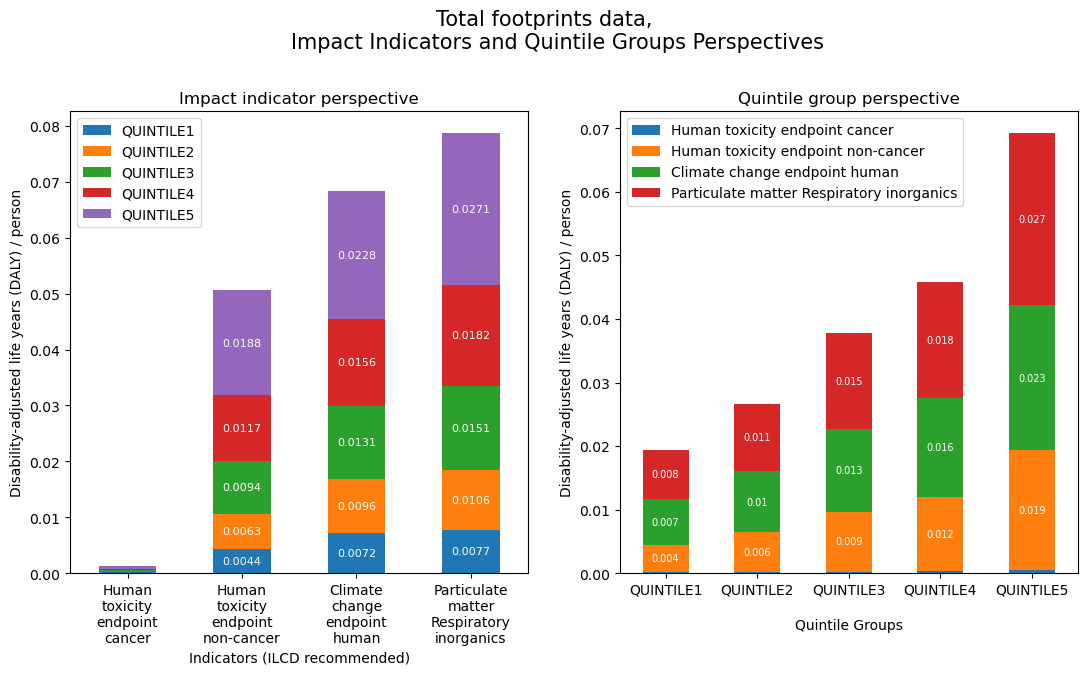

In [11]:
# common plot
fig, ax = plt.subplots(figsize=(13, 6), nrows=1, ncols=2)

fpt_total.plot.bar(stacked=True, rot=0, ax=ax[0])
new_names0 = name_shrtnr(fpt_total.T.columns.to_list(), 4, "\n")
ax[0].set_xticklabels(new_names0)
ax[0].set_title("Impact indicator perspective")
ax[0].set_xlabel("Indicators (ILCD recommended)")
ax[0].set_ylabel("Disability-adjusted life years (DALY) / person")
plot_labels(ax[0], sig_fig=4, height_rest=0.001, fontsize=8)

fpt_total.T.plot.bar(stacked=True, rot=0, ax=ax[1])
new_names1 = name_shrtnr(fpt_total.T.columns.to_list(), 4, " ")
ax[1].legend(new_names1)
ax[1].set_title("Quintile group perspective")
ax[1].set_xlabel("\nQuintile Groups")
ax[1].set_ylabel("Disability-adjusted life years (DALY) / person")
plot_labels(ax[1], sig_fig=3, height_rest=0.001, fontsize=7)

fig.suptitle(
    "Total footprints data,\
    \nImpact Indicators and Quintile Groups Perspectives",
    size=15,
    y=1.05,
)
plt.show()

#### Question: Does the total footprint substantially differ between the different groups? If yes, how do you explain the differences between the groups?

From the impact indicator perspective, we observe that the human toxicity endpoint cancer indicator is considerably smaller than the non-cancer endpoint. This is likely due to the fact that it non-cancerous health conditions are medically more readily encountered or incited when considering toxicity. The climate change endpoint is even greater, but not as much as the particulate matter respiratory inorganics group. (We will be looking at this group in more detail in the next questions). 

From the income group perspective, we don't observe any differences as drastic as observed with the impact indicators. Note that the human toxicity endpoint is just barely visible in the last quintiles, reflecting the data in the previous graph. This would have been easy to miss, hence both graphs were plotted!

Let's have a closer look at the results.

In [12]:
foo = fpt_total.sum(axis=1)
bar = pd.DataFrame(foo, columns=["Avg number of life days lost"])
bar.index = name_shrtnr(foo.index, 4)
bar = round(bar * 365.25, 3)
bar

,Avg number of life days lost
Human toxicity endpoint cancer,0.486
Human toxicity endpoint non-cancer,18.489
Climate change endpoint human,24.943
Particulate matter Respiratory inorganics,28.752


In [13]:
print(
    "Total number of days lost per life per person (from 4 indicators combined): ",
    bar.sum()[0],
)

Total number of days lost per life per person (from 4 indicators combined):  72.67


Seems plausible but equally scary, considering that there are other impact indicators that we didn't even consider - we only took 4.

#### Bonus: Calculate the total national footprints by summing over the groups and compare the results to the EXIOBASE national footprint. Which of the two is higher? Why?

In [14]:
foo = fpt_total.sum(axis=1)
bar = exio3.impacts.D_cba.loc[impact_cat_names, "GB"].sum(
    axis=1
)  # exio base national footprint
fpt_comp = pd.DataFrame()
fpt_comp["HBS"] = foo
fpt_comp["EXIO"] = bar
fpt_comp["HBS difference [%]"] = abs(
    (fpt_comp.HBS - fpt_comp.EXIO) / fpt_comp.HBS * 100
)
fpt_comp.index = name_shrtnr(fpt_comp.index.to_list(), 4)  # for clarity
fpt_comp.round(1)

,HBS,EXIO,HBS difference [%]
Human toxicity endpoint cancer,0.0,27362.7,2.057104e+09
Human toxicity endpoint non-cancer,0.1,892911.7,1.763920e+09
Climate change endpoint human,0.1,965241.3,1.413453e+09
Particulate matter Respiratory inorganics,0.1,1067189.8,1.355678e+09


We see that the numbers don't really line up. This is because the HBS data is per person, which needs to be converted within each quintile to match that of EXIOBASE. For this we'd need to use country's total population as well as the average number of people per household per income group at the minimum. Unfortunately I was unable to find the latter. A fellow student, who managed to complete this bonus question, looked into his HBS sources and noted the absence of data on HBS quintiles. Other cross-sectional variables (i.e. degree of urbanization etc.) had their datasets published openly or were at least easier to locate... With this in mind, I'm not exactly sure how best to make the comparison here and which sources to use, so I chose to skip the rest of this bonus question.

---
### Footprints by source sector & region

##### Methodology and Calculation


__Footprints__ by source:

$$\text{Fpt}_{\text{source}} = S \cdot \text{diag}(X) = S\cdot \text{diag}(L\cdot Y)$$
whereby X is the total industrial outputs. Here we need to iterate group-wise.

__Footprints__ by final product:
$$\text{Fpt}_{\text{product}} = S\cdot L \cdot \text{diag}(Y)$$

Additionally we need to divide the Y matrix by 1 million to obtain the correct EUR currency unit.

In [15]:
chosen_impact = impact_cat_names[2]
print("Chosen impact category: ", chosen_impact)

Chosen impact category:  Particulate matter/Respiratory inorganics endpoint | ILCD recommended CF | Disability Adjusted Life Years (DALY)


In [16]:
quint_cols = []
for quint_col in range(len(quint_fin.columns)):
    foo = S_pick
    bar = exio3.L
    baz = quint_fin.iloc[:, quint_col]

    # create result (intermediate) df
    foobar = foo.to_numpy().dot(np.diag(bar.to_numpy().dot(baz.to_numpy())))
    res = pd.DataFrame(foobar, index=foo.index, columns=foo.columns)

    # extract impact data, resulting in a series
    col = res.loc[chosen_impact]
    col.name = quint_fin.columns[quint_col]
    quint_cols.append(col)

fpt_source = pd.DataFrame(quint_cols).transpose()
fpt_source

QUINTILE1  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.757738e-07   
       Cereal grains nec                                  3.128754e-07   
       Vegetables, fruit, nuts                            5.318628e-08   
       Oil seeds                                          1.408551e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       6.286081e-09   
       Recreational, cultural and sporting services (92)  2.421029e-08   
       Other services (93)                                2.094902e-08   
       Private households with employed persons (95)      3.502316e-09   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE2  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              2.297451e-07   
       Cereal grains nec                                  4.107156e-07   
       Vegetables, fruit, nuts                            7.019444e-08   
       Oil seeds                                          1.862869e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       8.506035e-09   
       Recreational, cultural and sporting services (92)  3.516359e-08   
       Other services (93)                                3.079703e-08   
       Private households with employed persons (95)      4.872773e-09   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE3  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.087938e-07   
       Cereal grains nec                                  5.519811e-07   
       Vegetables, fruit, nuts                            9.153524e-08   
       Oil seeds                                          2.478189e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       1.178336e-08   
       Recreational, cultural and sporting services (92)  4.874347e-08   
       Other services (93)                                4.340456e-08   
       Private households with employed persons (95)      5.826066e-09   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE4  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.714138e-07   
       Cereal grains nec                                  6.535630e-07   
       Vegetables, fruit, nuts                            1.070377e-07   
       Oil seeds                                          2.860631e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       1.405792e-08   
       Recreational, cultural and sporting services (92)  6.246094e-08   
       Other services (93)                                5.386035e-08   
       Private households with employed persons (95)      6.075906e-09   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE5  
region sector                                                           
AT     Paddy rice                                         0.000

Rank the source sectors by their contribution (for each group)

In [17]:
def fpt_getrank(df, ind_var):
    """
    Process footprint dataframe to get the share
    and rank columns for each group. The result
    is given in reference to either sector or region.

    Parameters
    ----------
    df      :   [pandas DataFrame]
                Input dataframe of certain multiindex format.
    ind_var :   [string]
                Index variable; either "group" or "region".

    Returns
    -------
    df_rank :   [pandas DataFrame]
                Processed dataframe with share
                and rank columns by ind_var.
    """

    # preprocessing for wide to long melt
    df = df.transpose()
    df = df.loc[(df != 0).any(axis=1)]  # drop zero values
    df.index.name = "group"
    df = pd.melt(df.reset_index(), id_vars=["group"])
    df.set_index(keys=["group", "region", "sector"], inplace=True)

    # filter for the desired index variable and make columns
    df_share = df.groupby(level=["group", ind_var]).sum()
    df_share["share"] = df_share.transform(lambda x: x / x.sum())
    df_share["rank"] = df_share.groupby(["group"])["value"].rank(ascending=False)

    # filter for the top 3 values in the rank column
    df_rank = df_share[df_share["rank"] < 4]

    return df_rank

In [18]:
fptrnk_source_sector = fpt_getrank(fpt_source, "sector")
fptrnk_source_sector

value  \
group     sector                                                         
QUINTILE1 Basic iron and steel and of ferro-alloys and fi...  0.001375   
          Cattle                                              0.000436   
          Electricity by coal                                 0.000713   
QUINTILE2 Basic iron and steel and of ferro-alloys and fi...  0.001984   
          Cattle                                              0.000585   
          Electricity by coal                                 0.000984   
QUINTILE3 Basic iron and steel and of ferro-alloys and fi...  0.003026   
          Cattle                                              0.000783   
          Electricity by coal                                 0.001399   
QUINTILE4 Basic iron and steel and of ferro-alloys and fi...  0.003768   
          Cattle                                              0.000929   
          Electricity by coal                                 0.001688   
QUINTILE5 Basic iron and steel and of ferro-alloys and fi...  0.005878   
          Electricity by coal                                 0.002561   
          Sea and coastal water transportation services       0.001601   

                                                                 share  rank  
group     sector                                                              
QUINTILE1 Basic iron and steel and of ferro-alloys and fi...  0.017461   1.0  
          Cattle                                              0.005534   3.0  
          Electricity by coal                                 0.009062   2.0  
QUINTILE2 Basic iron and steel and of ferro-alloys and fi...  0.025198   1.0  
          Cattle                                              0.007429   3.0  
          Electricity by coal                                 0.012504   2.0  
QUINTILE3 Basic iron and steel and of ferro-alloys and fi...  0.038446   1.0  
          Cattle                                              0.009943   3.0  
          Electricity by coal                                 0.017769   2.0  
QUINTILE4 Basic iron and steel and of ferro-alloys and fi...  0.047868   1.0  
          Cattle                                              0.011800   3.0  
          Electricity by coal                                 0.021443   2.0  
QUINTILE5 Basic iron and steel and of ferro-alloys and fi...  0.074672   1.0  
          Electricity by coal                                 0.032536   2.0  
          Sea and coastal water transportation services       0.020338   3.0

Rank the regions by their contribution (for each group)

In [19]:
fptrnk_source_region = fpt_getrank(fpt_source, "region")
fptrnk_source_region

value     share  rank
group     region                          
QUINTILE1 CN      0.001322  0.016797   2.0
          GB      0.001663  0.021120   1.0
          IN      0.000756  0.009603   3.0
QUINTILE2 CN      0.001918  0.024360   2.0
          GB      0.002204  0.027996   1.0
          WA      0.001036  0.013158   3.0
QUINTILE3 CN      0.002873  0.036501   2.0
          GB      0.002970  0.037735   1.0
          WA      0.001485  0.018867   3.0
QUINTILE4 CN      0.003529  0.044836   2.0
          GB      0.003534  0.044897   1.0
          WA      0.001787  0.022700   3.0
QUINTILE5 CN      0.005558  0.070609   1.0
          GB      0.005056  0.064226   2.0
          WA      0.002679  0.034027   3.0

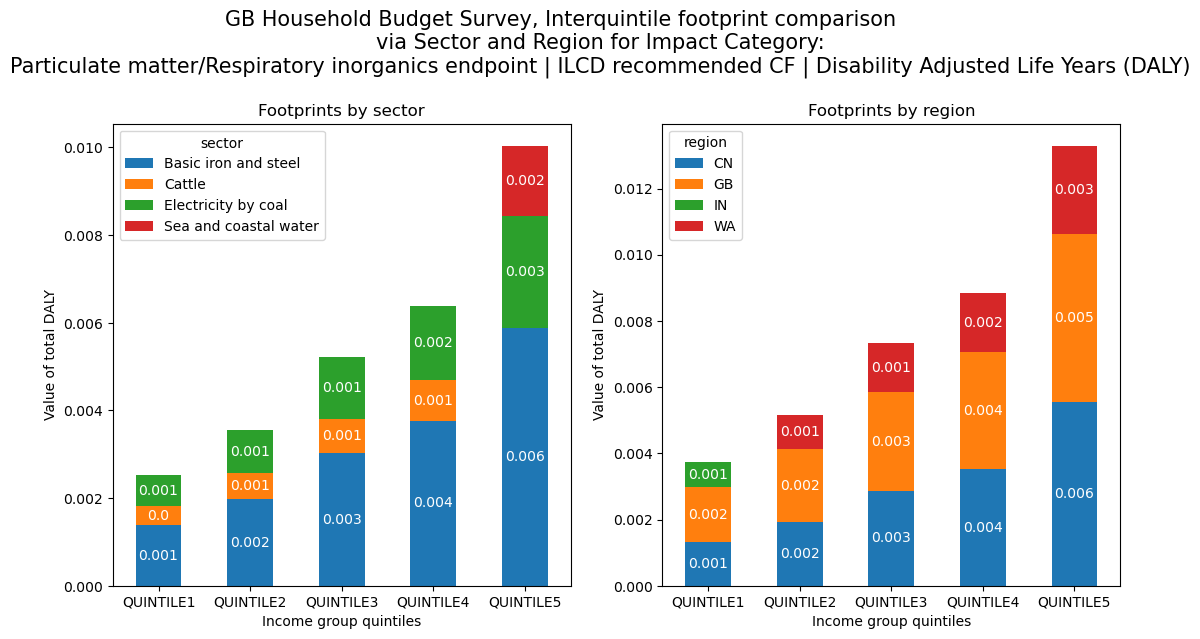

In [20]:
# common plot
fig, ax = plt.subplots(figsize=(13, 6), nrows=1, ncols=2)

fptrnk_source_sector.unstack().value.plot.bar(stacked=True, rot=0, ax=ax[0])
new_names = name_shrtnr(ax[0].get_legend_handles_labels()[1], 4)
ax[0].legend(new_names, title="sector")
ax[0].set_xlabel("Income group quintiles")
ax[0].set_ylabel("Value of total DALY")
ax[0].set_title("Footprints by sector")
plot_labels(ax[0])

fptrnk_source_region.unstack().value.plot.bar(stacked=True, rot=0, ax=ax[1])
ax[1].set_xlabel("Income group quintiles")
ax[1].set_ylabel("Value of total DALY")
ax[1].set_title("Footprints by region")
plot_labels(ax[1])

title_str = "GB Household Budget Survey, Interquintile footprint comparison\
            \nvia Sector and Region for Impact Category:\n"
fig.suptitle(
    title_str + chosen_impact,
    size=15,
    y=1.07,
)

plt.show()

#### Bonus: Show a piece of results from your breakdown by source sectors that you find interesting and interpret it.


The thing that jumps out at me is that the Sea and coastal water transportation group is only present in the fifth quintile. Let's examine the category in more detail from the original dataframe.

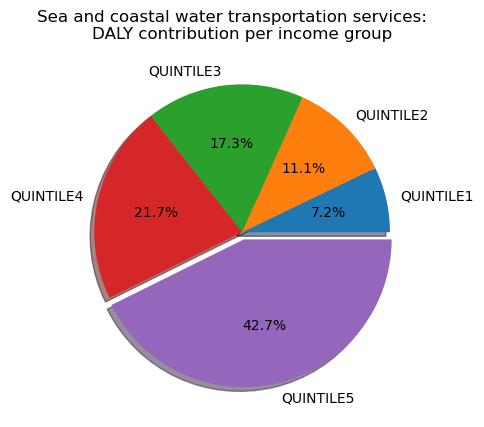

In [21]:
fpt_water = fpt_source.loc[("GB")].loc["Sea and coastal water transportation services"]

fig, ax = plt.subplots()
explode = (0, 0, 0, 0, 0.05)
ax = fpt_water.plot.pie(autopct="%1.1f%%", shadow=True, explode=explode)
ax.set_ylabel("")
ax.set_title(
    "Sea and coastal water transportation services:\
    \nDALY contribution per income group"
)
plt.show()

We observe that the fifth quintile contributes nearly half of the total impact in the category "Sea and coastal water transportation services". Originally I assumed that this may be due to ownership and operation of private boats by the ultra-rich. In that scenario it would have been interesting to calculate the impact those have on human lifespans.

However the impact category is somewhat too broad to villainize private boats alone; from my understanding, international trade is also included. From that perspective, consumption-based modelling could also correlate [CP011] food and water transportation factors.

In [22]:
print("DALY converted to hours per quintile:")
round(fpt_water * 365.25 * 24, 1)

DALY converted to hours per quintile:


QUINTILE1    1.0
QUINTILE2    1.6
QUINTILE3    2.4
QUINTILE4    3.1
QUINTILE5    6.0
Name: Sea and coastal water transportation services, dtype: float64

---
### Footprints by final product (&country of origin) and group

In [23]:
quint_cols = []
for quint_col in range(len(quint_fin.columns)):
    foo = S_pick
    bar = exio3.L
    baz = quint_fin.iloc[:, quint_col]

    # create result (intermediate) df
    foobar = foo.to_numpy().dot(bar.to_numpy().dot(np.diag(baz)))
    res = pd.DataFrame(foobar, index=foo.index, columns=foo.columns)

    # extract impact data, resulting in a series
    col = res.loc[chosen_impact]
    col.name = quint_fin.columns[quint_col]
    quint_cols.append(col)

fpt_product = pd.DataFrame(quint_cols).transpose()
fpt_product

QUINTILE1  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              0.000000e+00   
       Cereal grains nec                                  5.036660e-08   
       Vegetables, fruit, nuts                            5.115776e-08   
       Oil seeds                                          4.210985e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  6.458151e-08   
       Other services (93)                                5.910489e-08   
       Private households with employed persons (95)      4.630372e-07   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE2  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              0.000000e+00   
       Cereal grains nec                                  6.610255e-08   
       Vegetables, fruit, nuts                            6.805087e-08   
       Oil seeds                                          5.526615e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  1.060625e-07   
       Other services (93)                                1.044552e-07   
       Private households with employed persons (95)      6.451860e-07   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE3  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              0.000000e+00   
       Cereal grains nec                                  9.052613e-08   
       Vegetables, fruit, nuts                            8.749425e-08   
       Oil seeds                                          7.568591e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  1.439768e-07   
       Other services (93)                                1.472003e-07   
       Private households with employed persons (95)      7.629312e-07   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE4  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              0.000000e+00   
       Cereal grains nec                                  9.891961e-08   
       Vegetables, fruit, nuts                            1.007113e-07   
       Oil seeds                                          8.270341e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  2.036408e-07   
       Other services (93)                                1.947623e-07   
       Private households with employed persons (95)      7.871088e-07   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                             QUINTILE5  
region sector                                                           
AT     Paddy rice                                         0.000

In [24]:
fptrnk_product_sector = fpt_getrank(fpt_product, "sector")
fptrnk_product_sector

value     share  \
group     sector                                                                
QUINTILE1 Chemicals nec                                    0.000702  0.008915   
          Food products nec                                0.000571  0.007259   
          Furniture; other manufactured goods n.e.c. (36)  0.000578  0.007340   
QUINTILE2 Chemicals nec                                    0.000900  0.011432   
          Food products nec                                0.000769  0.009770   
          Furniture; other manufactured goods n.e.c. (36)  0.000838  0.010645   
QUINTILE3 Chemicals nec                                    0.001178  0.014965   
          Furniture; other manufactured goods n.e.c. (36)  0.001273  0.016169   
          Motor vehicles, trailers and semi-trailers (34)  0.001073  0.013634   
QUINTILE4 Chemicals nec                                    0.001349  0.017132   
          Furniture; other manufactured goods n.e.c. (36)  0.001612  0.020479   
          Motor vehicles, trailers and semi-trailers (34)  0.001526  0.019384   
QUINTILE5 Chemicals nec                                    0.001912  0.024291   
          Furniture; other manufactured goods n.e.c. (36)  0.002709  0.034411   
          Motor vehicles, trailers and semi-trailers (34)  0.002451  0.031134   

                                                           rank  
group     sector                                                 
QUINTILE1 Chemicals nec                                     1.0  
          Food products nec                                 3.0  
          Furniture; other manufactured goods n.e.c. (36)   2.0  
QUINTILE2 Chemicals nec                                     1.0  
          Food products nec                                 3.0  
          Furniture; other manufactured goods n.e.c. (36)   2.0  
QUINTILE3 Chemicals nec                                     2.0  
          Furniture; other manufactured goods n.e.c. (36)   1.0  
          Motor vehicles, trailers and semi-trailers (34)   3.0  
QUINTILE4 Chemicals nec                                     3.0  
          Furniture; other manufactured goods n.e.c. (36)   1.0  
          Motor vehicles, trailers and semi-trailers (34)   2.0  
QUINTILE5 Chemicals nec                                     3.0  
          Furniture; other manufactured goods n.e.c. (36)   1.0  
          Motor vehicles, trailers and semi-trailers (34)   2.0

In [25]:
fptrnk_product_region = fpt_getrank(fpt_product, "region")
fptrnk_product_region

value     share  rank
group     region                          
QUINTILE1 CN      0.000809  0.010282   2.0
          GB      0.003221  0.040913   1.0
          WA      0.000594  0.007549   3.0
QUINTILE2 CN      0.001207  0.015332   2.0
          GB      0.004278  0.054341   1.0
          WA      0.000812  0.010320   3.0
QUINTILE3 CN      0.001833  0.023291   2.0
          GB      0.005853  0.074358   1.0
          WA      0.001148  0.014583   3.0
QUINTILE4 CN      0.002259  0.028692   2.0
          GB      0.007024  0.089223   1.0
          WA      0.001365  0.017337   3.0
QUINTILE5 CN      0.003634  0.046166   2.0
          GB      0.010286  0.130669   1.0
          WA      0.002019  0.025652   3.0

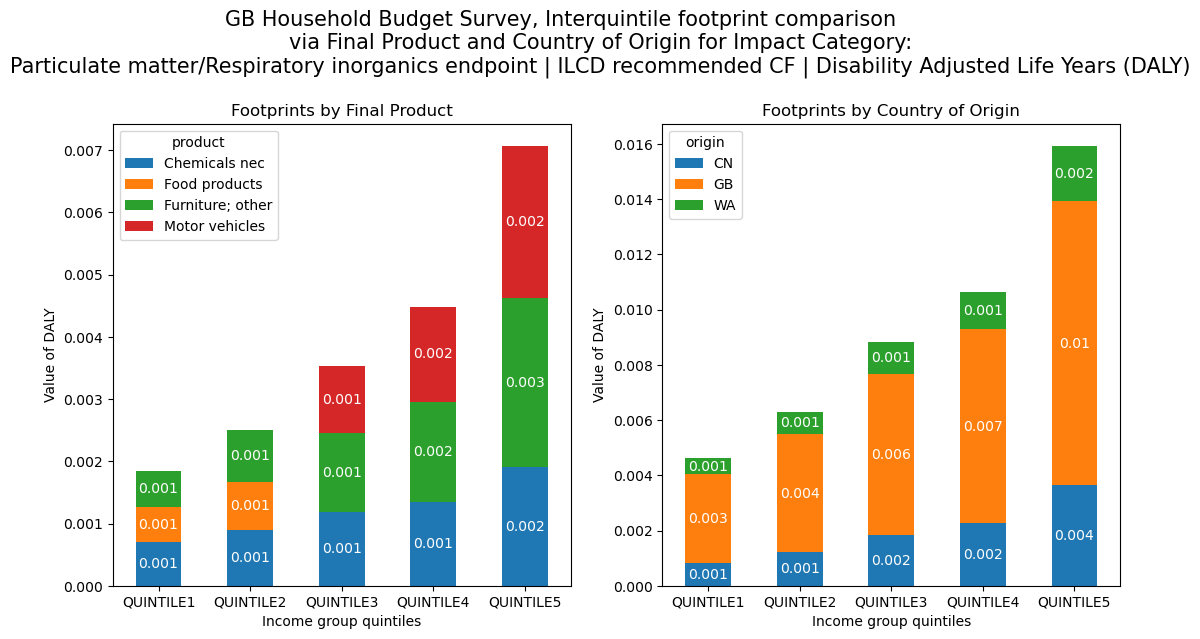

In [26]:
# common plot
fig, ax = plt.subplots(figsize=(13, 6), nrows=1, ncols=2)

fptrnk_product_sector.unstack().value.plot.bar(stacked=True, rot=0, ax=ax[0])
new_names = name_shrtnr(ax[0].get_legend_handles_labels()[1], 2)
ax[0].legend(new_names, title="product")
ax[0].set_xlabel("Income group quintiles")
ax[0].set_ylabel("Value of DALY")
ax[0].set_title("Footprints by Final Product")
plot_labels(ax[0])

fptrnk_product_region.unstack().value.plot.bar(stacked=True, rot=0, ax=ax[1])
ax[1].legend(title="origin")
ax[1].set_xlabel("Income group quintiles")
ax[1].set_ylabel("Value of DALY")
ax[1].set_title("Footprints by Country of Origin")
plot_labels(ax[1])

title_str = "GB Household Budget Survey, Interquintile footprint comparison\
            \nvia Final Product and Country of Origin for Impact Category:\n"
fig.suptitle(
    title_str + chosen_impact,
    size=15,
    y=1.07,
)

plt.show()

#### Bonus: Show a piece of results from your breakdown by final product that you find interesting and interpret it.

Looking at the footprints by country of origin, we can make the following observations about DALY in the UK:
- Great Britain contributes the most across all groups
- China contributes considerably less than the UK
- WA contributes the least but is not insignificant
- Respective footprint contribution shares grow with each quintile
- Differences in footprint contribution grow with each quintile

What caught my interest was the __WA__ "Country of Origin". EXIOBASE3 contains data on 44 countries as well as 5 Rest of World regions - one of them being WA; this corresponds to countries in Asia and Pacific. I wanted to find out which countries those were exactly and visualize it.

First, let's get get the list of all RoW WA country names that we can plot with the `geopandas` package. The country data is not bundled with `pymrio`; it had to be manually extracted from the EXIOBASE source: https://ntnu.app.box.com/v/EXIOBASEconcordances/file/540136000130. Hereby I manually exported the full country list corresponding to "RoW Asia and Pacific" using Excel for convenience - the exported file is then imported as RoW_WA.

In [27]:
import geopandas as gpd
import warnings
from shapely.errors import ShapelyDeprecationWarning  # depends on your installation

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# country list filtered for "RoW Asia and Pacific"
RoW_WA = pd.read_csv("/Users/dannyeel/Documents/pymrio/row_countries.csv", header=None)
# full source list to compare against
gdf_full = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).name

# find names in geopandas
WA_filtered = []
for i in range(len(RoW_WA)):
    name = RoW_WA.loc[i][0]
    if gdf_full.eq(name).any() == True:
        WA_filtered.append(name)

print("RoW WA countries list includes (but is not limited to):", WA_filtered)

RoW WA countries list includes (but is not limited to): ['Afghanistan', 'Antarctica', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Cambodia', 'Fiji', 'Georgia', 'Kazakhstan', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'New Caledonia', 'New Zealand', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vanuatu', 'Vietnam']


We can now visualize the countries of origin along with RoW.

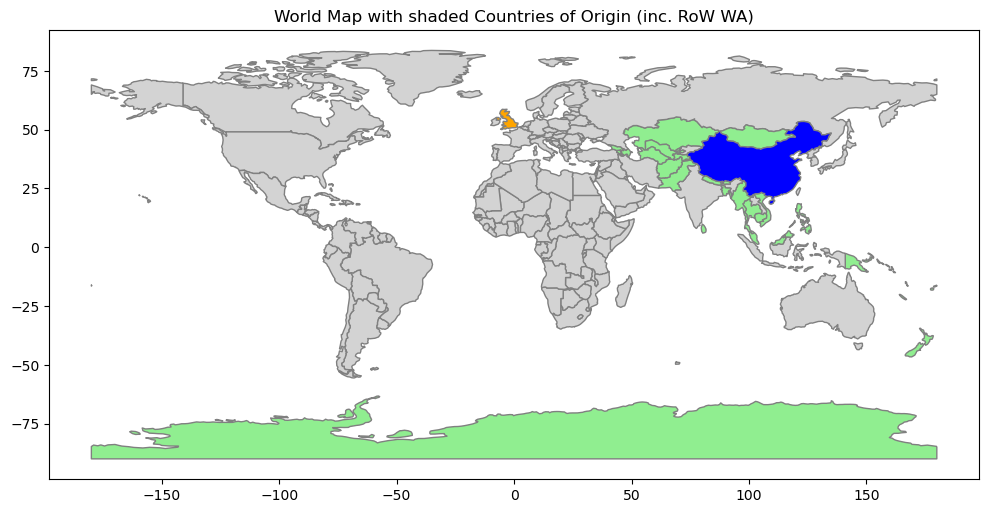

In [28]:
# actual plot
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
row_wa_countries = WA_filtered  # all colored red
countries_to_shade = ["China", "United Kingdom"]
shading_list = ["blue", "orange"]

world["color"] = "lightgray"  # Set default color to lightgray
world.loc[world["name"].isin(countries_to_shade), "color"] = shading_list
world.loc[world["name"].isin(row_wa_countries), "color"] = "lightgreen"

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color=world["color"], edgecolor="gray", legend=True)
plt.title("World Map with shaded Countries of Origin (inc. RoW WA)")
plt.show()